# Do certain Electric Utility providers have a higher concentration of electric vehicles?

### Methedology
1. Group by Electric Utility and count the number of vehicles (VIN (1-10))
2. Calculate the proportion of vehicles each utility is responsible for relative to the total number of vehicles
3. Visualize the data with a bar chart

In [1]:
# Importing libraries and loading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('../Original_data/Electric_Vehicle_Data.xlsx')

### Checking for Missing Values

In [2]:
# Check for missing values in 'Electric Utility'
missing_utilities = df['Electric Utility'].isnull().sum()
print(f'Missing Electric Utility values: {missing_utilities}')

Missing Electric Utility values: 3


In [3]:
# Drop rows with missing 'Electric Utility' since they are few
df_cleaned = df.dropna(subset=['Electric Utility'])

### Grouping Electric Utility rows to see how much EVs is in each utility

In [4]:
utility_counts = df_cleaned.groupby('Electric Utility').agg({'VIN (1-10)': 'count'}).reset_index()
utility_counts.columns = ['Electric Utility', 'Number of Vehicles']

# To see all the data frame
pd.set_option('display.max_rows', 76)
pd.set_option('display.max_colwidth', None)
utility_counts

,Electric Utility,Number of Vehicles
0,AVISTA CORP,409
1,"BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC",47
2,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY,2846
3,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||PUD NO 1 OF ASOTIN COUNTY,73
4,BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN,4
5,"BONNEVILLE POWER ADMINISTRATION||BIG BEND ELECTRIC COOP, INC",35
6,BONNEVILLE POWER ADMINISTRATION||CITY OF CENTRALIA - (WA)|CITY OF TACOMA - (WA),224
7,BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA),5
8,BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA),134
9,BONNEVILLE POWER ADMINISTRATION||CITY OF MCCLEARY - (WA),15


### Cleaning the data further to get a better aggregation

In [5]:
# Extractiong only the text before the '||' character
# Escape the '||' characters by using double backslashes '\\'
utility_counts['Electric Utility'] = utility_counts['Electric Utility'].str.split(r'\|\|').str[0]

# Display the updated DataFrame
utility_counts.head()

,Electric Utility,Number of Vehicles
0,AVISTA CORP,409
1,BONNEVILLE POWER ADMINISTRATION,47
2,BONNEVILLE POWER ADMINISTRATION,2846
3,BONNEVILLE POWER ADMINISTRATION,73
4,BONNEVILLE POWER ADMINISTRATION,4


In [6]:
# Grouping the cleaned data
utility_counts = utility_counts.groupby('Electric Utility')['Number of Vehicles'].sum().reset_index()

# Display the grouped DataFrame
utility_counts

,Electric Utility,Number of Vehicles
0,AVISTA CORP,409
1,BONNEVILLE POWER ADMINISTRATION,35003
2,CITY OF BLAINE - (WA),193
3,CITY OF CHENEY - (WA),45
4,CITY OF CHEWELAH,9
5,CITY OF SEATTLE - (WA),1
6,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),32012
7,CITY OF SUMAS - (WA),7
8,CITY OF TACOMA - (WA),280
9,MODERN ELECTRIC WATER COMPANY,1154


## Cleaned Utility Counts Table

In [7]:
# Replace rows where 'Electric Utility' contains 'COUNTY' or 'CITY' or exactly matches 'NO KNOWN ELECTRIC UTILITY SERVICE'
utility_counts['Electric Utility'] = utility_counts['Electric Utility'].replace(
    to_replace=r'.*(COUNTY|CITY).*|NO KNOWN ELECTRIC UTILITY SERVICE', 
    value='UNKNOWN/OTHER UTILITIES', 
    regex=True
)

# Group by 'Electric Utility' and sum the 'Number of Vehicles'
cleaned_utility_counts = utility_counts.groupby('Electric Utility', as_index=False)['Number of Vehicles'].sum()

# Display the cleaned data frame
cleaned_utility_counts

,Electric Utility,Number of Vehicles
0,AVISTA CORP,409
1,BONNEVILLE POWER ADMINISTRATION,35003
2,MODERN ELECTRIC WATER COMPANY,1154
3,NON WASHINGTON STATE ELECTRIC UTILITY,395
4,PACIFICORP,1341
5,PORTLAND GENERAL ELECTRIC CO,5
6,PUGET SOUND ENERGY INC,107975
7,UNKNOWN/OTHER UTILITIES,35173


## Visualizing the Data

Due to the little number of vehicles in some providers such as 'PACIFICORP' and all other providers with a small number of vehicles, I'll group these small providers with the 'UNKNOWN/OTHER UTILITIES' to get a better visualization

In [8]:
# Reset the display options to their default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

In [13]:
# Replace all other electric utilities with 'UNKNOWN/OTHER UTILITIES', except for 'PUGET SOUND ENERGY INC' and 'BONNEVILLE POWER ADMINISTRATION'
cleaned_utility_counts['Electric Utility'] = cleaned_utility_counts['Electric Utility'].apply(
    lambda x: 'UNKNOWN/OTHER UTILITIES'
    if x not in ['PUGET SOUND ENERGY INC', 'BONNEVILLE POWER ADMINISTRATION'] 
    else x
)

# Group by 'Electric Utility' and sum the 'Number of Vehicles'
visualization_utility_counts = cleaned_utility_counts.groupby('Electric Utility', as_index=False)['Number of Vehicles'].sum()

visualization_utility_counts

,Electric Utility,Number of Vehicles
0,BONNEVILLE POWER ADMINISTRATION,35003
1,PUGET SOUND ENERGY INC,107975
2,UNKNOWN/OTHER UTILITIES,38477


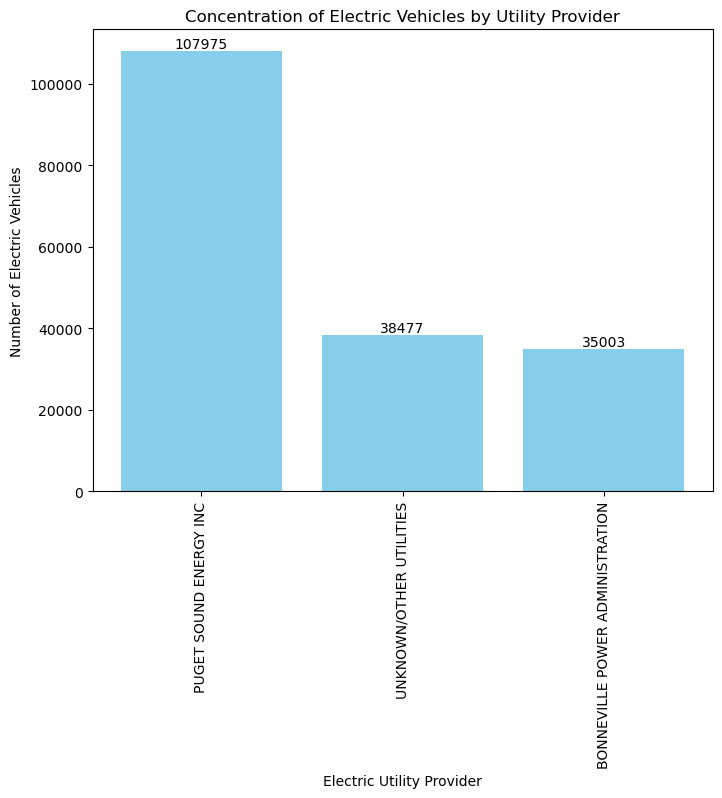

In [20]:
plt.figure(figsize=(8, 6))
utility_counts_sorted = visualization_utility_counts.sort_values(by='Number of Vehicles', ascending=False)

# Get bar positions for centering labels
bar_positions = plt.bar(utility_counts_sorted['Electric Utility'], utility_counts_sorted['Number of Vehicles'], color='skyblue')

# Add labels above each bar with centering
for bar, value in zip(bar_positions, utility_counts_sorted['Number of Vehicles']):
  plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, f"{value}", ha='center', va='bottom', fontsize=10)  # Adjust offset and font size as needed

plt.title('Concentration of Electric Vehicles by Utility Provider')
plt.xlabel('Electric Utility Provider')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=90)
plt.show()